csv ref : https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/data

In [1]:
import pandas as pd
penguin_df = pd.read_csv('/content/sample_data/penguins_size.csv')
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#### Edit csv file with the following steps
* Delete island
* Delete sex
* Replace Adelie with 0
* Replace Chinstrap with 1 • Replace Gentoo with 2
* Move species

In [2]:
penguin_size_df = pd.read_csv('/content/sample_data/penguin_size_edited.csv').dropna()
penguin_size_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,2
340,46.8,14.3,215.0,4850.0,2
341,50.4,15.7,222.0,5750.0,2
342,45.2,14.8,212.0,5200.0,2


In [3]:
penguin_size_df['flipper_length_mm'] = penguin_size_df['flipper_length_mm']/ 10
penguin_size_df['body_mass_g'] = penguin_size_df['body_mass_g']/100
penguin_size_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,18.1,37.50,0
1,39.5,17.4,18.6,38.00,0
2,40.3,18.0,19.5,32.50,0
4,36.7,19.3,19.3,34.50,0
5,39.3,20.6,19.0,36.50,0
...,...,...,...,...,...
338,47.2,13.7,21.4,49.25,2
340,46.8,14.3,21.5,48.50,2
341,50.4,15.7,22.2,57.50,2
342,45.2,14.8,21.2,52.00,2


In [4]:
for i in range(1,3): ## 為啥要複製四遍
    penguin_size_df = penguin_size_df.append(penguin_size_df)
penguin_size_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,18.1,37.50,0
1,39.5,17.4,18.6,38.00,0
2,40.3,18.0,19.5,32.50,0
4,36.7,19.3,19.3,34.50,0
5,39.3,20.6,19.0,36.50,0
...,...,...,...,...,...
338,47.2,13.7,21.4,49.25,2
340,46.8,14.3,21.5,48.50,2
341,50.4,15.7,22.2,57.50,2
342,45.2,14.8,21.2,52.00,2


In [5]:
penguin_size_df.shape

(1368, 5)

## Train Test Spilt

In [6]:
from sklearn.model_selection import train_test_split
feature =['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
labels = 'species'
x_train, x_test, y_train, y_test = train_test_split(penguin_size_df[feature].values, penguin_size_df[labels].values, test_size=0.30, random_state=0)

print('Training Set: %d, Tes Set: %d \n' %(len(x_train), len(x_test)))
print(x_train)
print(y_train)

Training Set: 957, Tes Set: 411 

[[42.8  14.2  20.9  47.  ]
 [43.3  14.   20.8  45.75]
 [50.2  18.7  19.8  37.75]
 ...
 [53.5  19.9  20.5  45.  ]
 [50.8  19.   21.   41.  ]
 [39.1  18.7  18.1  37.5 ]]
[2 2 1 0 0 1 2 2 2 2 0 0 1 1 0 1 0 0 0 1 2 1 1 0 1 2 1 1 2 0 2 0 2 1 2 0 0
 2 0 2 2 0 1 2 0 1 2 2 0 1 0 0 0 2 0 2 0 1 0 0 2 0 2 2 1 0 0 0 1 2 0 2 1 1
 0 0 2 0 2 2 1 0 0 2 2 2 1 0 0 0 2 0 1 2 1 0 1 2 2 1 0 2 0 0 2 0 1 0 0 2 2
 1 2 2 2 0 0 0 1 0 1 0 2 1 0 2 1 2 0 0 2 0 2 0 2 0 2 0 0 2 2 2 0 1 2 1 1 0
 1 0 2 0 2 0 2 1 0 1 0 2 0 2 2 0 0 0 2 1 2 0 1 1 0 1 2 0 2 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 2 0 0 0 0 1 1 0 1 2 2 2 0 2 1 2 1 2 0 2 0 1 1 2 1 0 0 1 0 0 2
 0 0 2 2 0 2 0 2 0 2 1 0 0 0 1 0 2 0 0 2 0 1 0 0 0 2 1 2 2 2 1 2 2 2 0 1 0
 2 1 2 2 0 1 0 2 2 0 1 2 0 0 0 0 0 2 0 2 1 0 2 2 0 1 1 0 0 2 2 1 2 0 0 2 1
 0 2 1 0 2 0 0 0 0 1 2 2 2 2 1 0 0 2 2 2 2 2 1 1 2 2 1 0 0 0 2 0 0 1 2 0 0
 2 1 2 0 0 0 0 2 0 2 0 2 0 2 2 0 2 0 1 0 2 0 0 0 0 1 0 0 0 0 0 1 0 2 0 2 0
 0 2 0 2 2 2 2 0 2 2 1 0 1 1 0 0 0 2 2 2 0 2 2 0

### Run with Tensorflow

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers
# Set random seed for reproducability tensorflow.random.set_seed(0)
print("Libraries imported.")
print('Keras version:',keras.__version__) 
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.9.0
TensorFlow version: 2.9.2


In [8]:
# Set data types for float features 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')# Set data types for categorical labels
y_train = utils.to_categorical(y_train) 
y_test = utils.to_categorical(y_test)

In [9]:
model = Sequential()
model.add(Dense(10, input_dim=len(feature),activation='relu'))
model.add(Dense(10, input_dim=10,activation='relu')) 
model.add(Dense(len(labels), input_dim=10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
learning_rate = 0.001 # learning rate 
opt = optimizers.Adam(learning_rate)
# model optimizer
# compiling the model with CC loss and optimizer! Alongwith Acc. metrics! 
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
# we will do 50 sets of run and in epochs, 10 will be the batch size
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs,batch_size=10,validation_data=(x_test, y_test))

Epoch 1/50


ValueError: ignored

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
epoch_nums = range(1,num_epochs+1) 
training_loss = history.history["loss"] 
validation_loss = history.history["val_loss"] 
plt.plot(epoch_nums, training_loss) 
plt.plot(epoch_nums, validation_loss) 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], 
loc='upper right')
plt.show()

NameError: ignored

In [12]:
for layer in model.layers: 
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1] print(‘ — — — — — —
  \nWeights:\n’,weights,’\nBiases:\n’, biases)

SyntaxError: ignored

13/13 [==============================] - 0s 4ms/step


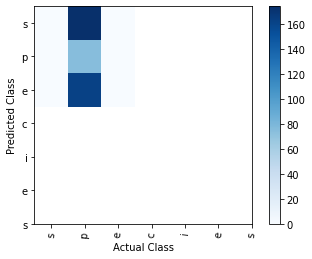

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
%matplotlib inline
class_probabilities = model.predict(x_test) 
predictions = np.argmax(class_probabilities, axis=1) 
true_labels = np.argmax(y_test, axis=1)
# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions) 
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(labels)) 
plt.xticks(tick_marks, labels, rotation=85) 
plt.yticks(tick_marks, labels) 
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()